In [1]:
import pandas as pd
data=pd.read_csv("elections_feature_reduced.csv")
data.shape

(2767, 37)

In [2]:
data.columns

Index(['winner', 'PostalAbbr', 'ub', 'fips', 'PST045214', 'PST120214',
       'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214',
       'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214',
       'RHI825214', 'POP715213', 'POP645213', 'EDU635213', 'EDU685213',
       'LFE305213', 'HSG096213', 'HSG495213', 'HSD410213', 'INC910213',
       'BZA110213', 'BZA115213', 'SBO001207', 'SBO315207', 'SBO115207',
       'SBO415207', 'SBO015207', 'WTN220207', 'RTN131207', 'LND110210',
       'POP060210'],
      dtype='object')

# Mean encoding of PostalAbbr feature

In [3]:
data_ml=data.copy()

In [4]:
data_ml=data_ml.drop(["fips",'ub'], axis=1)

In [5]:
Mean_encoded_PostalAbbr = data_ml.groupby(['PostalAbbr'])['winner'].mean().to_dict()

data_ml['PostalAbbr'] = data_ml['PostalAbbr'].map(Mean_encoded_PostalAbbr)

data_ml.head()


,winner,PostalAbbr,PST045214,PST120214,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI325214,...,BZA115213,SBO001207,SBO315207,SBO115207,SBO415207,SBO015207,WTN220207,RTN131207,LND110210,POP060210
0,1,0.695652,24965,-1.8,5.4,21.5,19.4,51.5,69.7,0.3,...,2.7,1385,19.1,0.0,0.0,33.4,0,2841,490.48,51.8
1,1,0.606557,62486,1.2,7.1,26.7,13.5,51.5,79.6,0.3,...,3.1,4289,0.0,0.0,1.4,25.4,0,8808,655.12,94.3
2,1,0.736842,33021,-0.4,6.0,20.9,21.3,51.3,68.8,0.7,...,-0.6,2944,6.0,0.0,0.0,23.1,59400,7749,449.50,73.8
3,1,1.000000,426236,8.6,6.2,25.1,12.6,49.9,92.4,0.8,...,2.2,42344,0.4,1.0,2.1,25.4,6006918,15720,1052.58,372.8
4,1,1.000000,3861,-2.9,4.2,17.0,24.9,48.5,96.4,1.0,...,7.3,492,0.0,0.0,0.0,18.1,0,5627,1363.06,2.9


In [6]:
data_ml.shape

(2767, 35)

In [7]:
pd.pandas.set_option('display.max_columns',None)

# Separating target from features

In [8]:
y=data_ml["winner"]

In [9]:
X=data_ml.drop(["winner"],axis=1)

In [10]:
#X[X.isna().any(axis=1)]
X.isna().sum().sum()

0

In [11]:
y.isna().sum()

0

# Standardization for Logit Regression

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

**Splitting data into train and test**

In [14]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(solver='lbfgs', max_iter=1000)
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [16]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8303249097472925
Precision is:  0.8463541666666666
Recall is:  0.9027777777777778
f1 score is:  0.8736559139784946


In [17]:
from sklearn.metrics import classification_report
y_actual = pd.Series(y_test)
y_predicted = pd.Series(y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       194
           1       0.85      0.90      0.87       360

    accuracy                           0.83       554
   macro avg       0.82      0.80      0.81       554
weighted avg       0.83      0.83      0.83       554



In [18]:
confusion_matrix(y_test,y_pred)

array([[135,  59],
       [ 35, 325]], dtype=int64)

### Naive Bayes with standardized data

In [19]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(X_train,y_train)

GaussianNB()

In [20]:
y_pred = nv.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.7436823104693141
Precision is:  0.7400881057268722
Recall is:  0.9333333333333333
f1 score is:  0.8255528255528255


In [21]:
confusion_matrix(y_test,y_pred)

array([[ 76, 118],
       [ 24, 336]], dtype=int64)

# Normalization for K-Nearest Neighbors

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
X_scaled_nor = scaler.fit_transform(X)

**Splitting data into train and test**

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled_nor,y,random_state=42,test_size=0.2)

In [24]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [25]:
acc_values

[0.8158844765342961,
 0.8231046931407943,
 0.8158844765342961,
 0.8086642599277978,
 0.8068592057761733,
 0.8158844765342961,
 0.8104693140794224,
 0.8086642599277978,
 0.8032490974729242,
 0.8104693140794224,
 0.8050541516245487,
 0.8068592057761733]

Text(0, 0.5, 'accuracy')

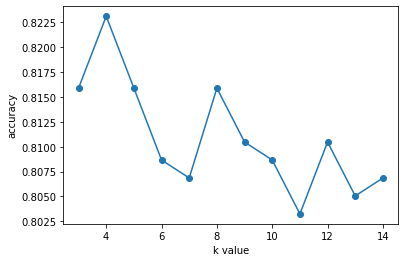

In [26]:
import matplotlib.pyplot as plt
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

**k=4 gives the highest value of accuracy**

In [49]:
classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [50]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8231046931407943
Precision is:  0.8679775280898876
Recall is:  0.8583333333333333
f1 score is:  0.8631284916201116


In [51]:
confusion_matrix(y_test,y_pred)

array([[147,  47],
       [ 51, 309]], dtype=int64)

# SVM

In [30]:
from sklearn.svm import SVC
svm_linear= SVC(kernel='linear')
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [31]:
y_pred=svm_linear.predict(X_test)

In [32]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8393501805054152
Precision is:  0.8501291989664083
Recall is:  0.9138888888888889
f1 score is:  0.8808567603748327


In [33]:
confusion_matrix(y_test,y_pred)

array([[136,  58],
       [ 31, 329]], dtype=int64)

# Radial SVM

In [34]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)

SVC()

In [35]:
y_pred=svm_radial.predict(X_test)

In [36]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8267148014440433
Precision is:  0.8367346938775511
Recall is:  0.9111111111111111
f1 score is:  0.8723404255319148


In [37]:
confusion_matrix(y_test,y_pred)

array([[130,  64],
       [ 32, 328]], dtype=int64)

# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [39]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average='macro'))
print("Recall is: ", recall_score(y_test,y_pred,average='macro'))
print("f1 score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.8483754512635379
Precision is:  0.8387896825396826
Recall is:  0.8227233676975945
f1 score is:  0.8295759173807955


In [40]:
confusion_matrix(y_test,y_pred)

array([[143,  51],
       [ 33, 327]], dtype=int64)

**Feature Importance**

In [22]:
X_scaled_nor=pd.DataFrame(X_scaled_nor)

In [42]:
pd.pandas.set_option('display.max_rows',None)

In [43]:
pd.Series(rf.feature_importances_,index=X_scaled_nor.columns).sort_values(ascending=False)

0     0.211794
13    0.055905
7     0.051828
19    0.043102
20    0.035449
22    0.030431
21    0.028939
33    0.027780
17    0.026797
12    0.025750
25    0.025683
23    0.025075
2     0.025066
4     0.025062
8     0.024351
1     0.024040
32    0.023864
11    0.023631
5     0.022577
16    0.022441
24    0.020679
14    0.020565
31    0.020241
30    0.020152
6     0.018494
18    0.018337
15    0.018093
3     0.017179
9     0.016502
29    0.016362
26    0.013776
28    0.008558
27    0.006664
10    0.004832
dtype: float64

### Trying Logistic Regression on Normalized data

In [44]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(solver='lbfgs', max_iter=1000)
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [45]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8321299638989169
Precision is:  0.8431876606683805
Recall is:  0.9111111111111111
f1 score is:  0.8758344459279038


In [46]:
confusion_matrix(y_test,y_pred)

array([[133,  61],
       [ 32, 328]], dtype=int64)

**THis is pretty much the same accuracy as seen when using standardization, except for 1 less misclassification**

# Naive Bayes classifier

In [47]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(X_train,y_train)

GaussianNB()

In [48]:
y_pred = nv.predict(X_test)
accuracy_score(y_test,y_pred)

0.7436823104693141

**The Naive Bayes classifier yields a poorer accuracy score than the non-probabilistic classifiers above**

## The important observations upon using mean encoding instead of dummy encoding are that:

## 1.The performance of all algorithms except Logistic Regression has improved. But the performance of Logistic Regression algorithm has diminished.

## 2.The accuracy of the Random Forest algorithm has improved from 0.8122 to 0.8483

In [54]:
algo_method_name = ['LogisticReg and Normalization', 'Logistic Reg and Standardization', 'RandomForest and Normalization', 'SVM(linear) and normalization']
accuracy_ohe_nopca = [0.851, 0.8501 , 0.812 , 0.846]
accuracy_ohe_pca = [0, 0.8357 , 0.8086 , 0.8339]
accuracy_meanenc_nopca = [0.8321, 0.8303 , 0.8483 , 0.8393]
accuracy_meanenc_pca = [0, 0.8357 , 0.8068 , 0.8411]
zipped = list(zip(algo_method_name, accuracy_ohe_nopca, accuracy_ohe_pca, accuracy_meanenc_nopca, accuracy_meanenc_pca))
df = pd.DataFrame(zipped, columns=['Algorithm and method', 'OHE w/o PCA', 'OHE PCA', 'MeanEnc w/o PCA', 'MeanEnc PCA'])


In [53]:
df

,Algorithm and method,OHE w/o PCA,OHE PCA,MeanEnc w/o PCA,MeanEnc PCA
0,LogisticReg and Normalization,0.8510,0.0000,0.8321,0.0000
1,Logistic Reg and Standardization,0.8501,0.8357,0.8303,0.8357
2,RandomForest and Normalization,0.8120,0.8086,0.8483,0.8068
3,SVM(linear) and normalization,0.8460,0.8339,0.8393,0.8411


# GridSearchCV

In [29]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [37]:
# Run GridSearch to tune the hyper-parameter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
k_fold_cv = 5 # Stratified 5-fold cross validation
grid_params = {
 "n_estimators" : [10,50],
 "max_features" : ["auto", "sqrt"],
 "bootstrap" : [False],
 "criterion" : ['gini','entropy'],
# "splitter" : ['best','random'],
 "min_samples_split" : [0.1,0.2,0.3,0.4,0.5]
}
grid = GridSearchCV(rfc, param_grid=grid_params, cv=k_fold_cv, 
 n_jobs = 1, verbose = 0, return_train_score=True)
model = grid.fit(X_train, y_train)

from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [38]:
print('Best hyper parameter:', grid.best_params_)


Best hyper parameter: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 0.1, 'n_estimators': 50}


In [39]:
print('Best train score:', grid.best_score_)

Best train score: 0.8283025034983605


In [40]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8212996389891697
Precision is:  0.8536585365853658
Recall is:  0.875
f1 score is:  0.8641975308641976


In [41]:
confusion_matrix(y_test,y_pred)

array([[140,  54],
       [ 45, 315]], dtype=int64)

## RandomizedSearchCV

In [49]:
# Run RandomizedSearchCV to tune the hyper-parameter
from sklearn.model_selection import RandomizedSearchCV
rfc=RandomForestClassifier()
k_fold_cv = 5 # Stratified 5-fold cross validation
params = {
    "max_depth" : [6,9,12,None],
 "n_estimators" : [10,50,100,150],
 "max_features" : ["auto", "log2", "sqrt"],
 "bootstrap" : [True, False],
 "criterion" : ['gini','entropy'],
# "splitter" : ['best','random'],
 "min_samples_split" : [0.1,0.2,0.3,0.4,0.5]
 }
random = RandomizedSearchCV(rfc, param_distributions=params, cv=k_fold_cv,
 n_iter = 5, scoring='accuracy',verbose=2, random_state=42,
 n_jobs=-1, return_train_score=True)
model=random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [50]:
print('Best hyper parameter:', random.best_params_)

Best hyper parameter: {'n_estimators': 100, 'min_samples_split': 0.1, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'gini', 'bootstrap': True}


In [51]:
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [52]:
print('Best train score:', random.best_score_)

Best train score: 0.826038017221127


In [53]:
y_pred=model.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8122743682310469
Precision is:  0.8368421052631579
Recall is:  0.8833333333333333
f1 score is:  0.8594594594594595


In [54]:
confusion_matrix(y_test,y_pred)

array([[132,  62],
       [ 42, 318]], dtype=int64)

## Gradient Boosting Classifier with RandomizedSearchCV

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
model = GradientBoostingClassifier()
parameters = {"learning_rate": sp_randFloat(),
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(100, 1000),
                  "max_depth"    : sp_randInt(4, 10)
                 }
randm_XGB = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 5, n_iter = 10, n_jobs=-1)
randm_XGB.fit(X_train, y_train)

print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm_XGB.best_estimator_)
print("The best score across ALL searched params:", randm_XGB.best_score_)
print("The best parameters across ALL searched params:", randm_XGB.best_params_)


 Results from Random Search 
The best estimator across ALL searched params: GradientBoostingClassifier(learning_rate=0.07760012769115099, max_depth=9,
                           n_estimators=891, subsample=0.7554964325357525)
The best score across ALL searched params: 0.8508830168636303
The best parameters across ALL searched params: {'learning_rate': 0.07760012769115099, 'max_depth': 9, 'n_estimators': 891, 'subsample': 0.7554964325357525}


In [57]:
y_pred=randm_XGB.predict(X_test)

In [58]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8429602888086642
Precision is:  0.8491048593350383
Recall is:  0.9222222222222223
f1 score is:  0.8841544607190414


In [59]:
confusion_matrix(y_test,y_pred)

array([[135,  59],
       [ 28, 332]], dtype=int64)

In [60]:
from pprint import pprint
pprint(randm_XGB.best_estimator_.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.07760012769115099,
 'loss': 'deviance',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 891,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.7554964325357525,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


## XtremeGradientBoostingClassifier with RandomSearchCV

In [15]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
model = xgboost.XGBClassifier()
parameters = {"learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(100, 1000),
                  "max_depth"    : [ 3, 4, 5, 6, 8, 10, 12, 15],
                  "min_child_weight" : [ 1, 3, 5, 7 ],
                  "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
                 }
randm_XGB1 = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 5, n_iter = 10, n_jobs=-1)
randm_XGB1.fit(X_train, y_train)

print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm_XGB1.best_estimator_)
print("The best score across ALL searched params:", randm_XGB1.best_score_)
print("The best parameters across ALL searched params:", randm_XGB1.best_params_)


C:\Users\Dilip\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Random Search 
The best estimator across ALL searched params: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=826, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.40419925222818365, tree_method='exact',
              validate_parameters=1, verbosity=None)
The 

In [16]:
y_pred=randm_XGB1.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8321299638989169
Precision is:  0.8414322250639387
Recall is:  0.9138888888888889
f1 score is:  0.8761651131824234


In [19]:
confusion_matrix(y_test,y_pred)

array([[132,  62],
       [ 31, 329]], dtype=int64)

In [20]:
from pprint import pprint
pprint(randm_XGB1.best_estimator_.get_params())

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.3,
 'enable_categorical': False,
 'gamma': 0.0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 12,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 826,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.40419925222818365,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}


## Logistic Regression with RandomSearchCV (using the standardized data)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42,test_size=0.2)

In [62]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()

In [63]:
logit_model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [68]:
from sklearn.model_selection import RandomizedSearchCV
k_fold_cv = 5 # Stratified 5-fold cross validation
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
 }
random = RandomizedSearchCV(logit_model, param_distributions=params, cv=k_fold_cv,
 n_iter = 5, scoring='accuracy',verbose=2, random_state=42,
 n_jobs=-1, return_train_score=True)
model=random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Dilip\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.8269338  0.79712164 0.82783878        nan 0.82783878]
  warnings.warn(
C:\Users\Dilip\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [0.83935929 0.80241773 0.83766444        nan 0.83777737]
  warnings.warn(
C:\Users\Dilip\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [69]:
print('Best hyper parameter:', random.best_params_)

Best hyper parameter: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 200, 'C': 1000}


In [70]:
print('Best train score:', random.best_score_)

Best train score: 0.8278387791998201


In [71]:
pprint(model.best_estimator_.get_params())

{'C': 1000,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [72]:
y_pred=model.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8429602888086642
Precision is:  0.8582677165354331
Recall is:  0.9083333333333333
f1 score is:  0.8825910931174088


In [73]:
confusion_matrix(y_test,y_pred)

array([[140,  54],
       [ 33, 327]], dtype=int64)

## Removing one feature, which gave low feature_importance_ score earlier

In [37]:
X_scaled_nor_FeRe=X_scaled_nor.drop([10],axis=1 )

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled_nor_FeRe,y,random_state=42,test_size=0.2)

In [26]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
model = xgboost.XGBClassifier()
parameters = {"learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(100, 1000),
                  "max_depth"    : [ 3, 4, 5, 6, 8, 10, 12, 15],
                  "min_child_weight" : [ 1, 3, 5, 7 ],
                  "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
                 }
randm_XGB2 = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 5, n_iter = 10, n_jobs=-1)
randm_XGB2.fit(X_train, y_train)

print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm_XGB2.best_estimator_)
print("The best score across ALL searched params:", randm_XGB2.best_score_)
#print("The best parameters across ALL searched params:", randm_XGB2.best_params_)

C:\Users\Dilip\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:11:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Random Search 
The best estimator across ALL searched params: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=262, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.79876164423499, tree_method='exact',
              validate_parameters=1, verbosity=None)
The best

In [27]:
y_pred=randm_XGB2.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8411552346570397
Precision is:  0.8578947368421053
Recall is:  0.9055555555555556
f1 score is:  0.8810810810810811


In [28]:
confusion_matrix(y_test,y_pred)

array([[140,  54],
       [ 34, 326]], dtype=int64)

### Trying RandomForestClassifier instead of XGB and using RandomizedSearchCV

In [39]:
# Run RandomizedSearchCV to tune the hyper-parameter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
k_fold_cv = 5 # Stratified 5-fold cross validation
params = {
    "max_depth" : [6,9,12,None],
 "n_estimators" : [10,50,100,150],
 "max_features" : ["auto", "log2", "sqrt"],
 "bootstrap" : [True, False],
 "criterion" : ['gini','entropy'],
# "splitter" : ['best','random'],
 "min_samples_split" : [0.1,0.2,0.3,0.4,0.5]
 }
random = RandomizedSearchCV(rfc, param_distributions=params, cv=k_fold_cv,
 n_iter = 5, scoring='accuracy',verbose=2, random_state=42,
 n_jobs=-1, return_train_score=True)
model=random.fit(X_train, y_train)
print('Best hyper parameter:', random.best_params_)
print('Best train score:', random.best_score_)
y_pred=model.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper parameter: {'n_estimators': 100, 'min_samples_split': 0.1, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'gini', 'bootstrap': True}
Best train score: 0.8260400600594465
Accuracy is:  0.8231046931407943
Precision is:  0.8447368421052631
Recall is:  0.8916666666666667
f1 score is:  0.8675675675675676


In [40]:
confusion_matrix(y_test,y_pred)

array([[135,  59],
       [ 39, 321]], dtype=int64)

### Trying again, by dropping one more feature

In [29]:
X_scaled_nor_FeRe.head()

,0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.695652,0.002459,0.373464,0.330508,0.425982,0.313525,0.801498,0.665537,0.003480,0.009434,0.040816,0.010460,0.687958,0.791837,0.019493,0.588889,0.126404,0.524242,0.069119,0.062814,0.003026,0.173092,0.001155,0.407021,0.001323,0.286357,0.000000,0.000000,0.594306,0.000000,0.035161,0.024357,0.001571
1,0.606557,0.006168,0.447174,0.474576,0.583082,0.192623,0.801498,0.777401,0.003480,0.009434,0.044218,0.020921,0.782199,0.728571,0.021442,0.501852,0.098315,0.563636,0.075808,0.059908,0.006963,0.206557,0.003463,0.409216,0.004097,0.000000,0.000000,0.017949,0.451957,0.000000,0.109010,0.032567,0.002863
2,0.736842,0.003256,0.407862,0.381356,0.407855,0.352459,0.794007,0.655367,0.008121,0.016509,0.054422,0.091004,0.607330,0.863265,0.136452,0.611111,0.196629,0.345455,0.057971,0.132558,0.004427,0.259186,0.002310,0.388919,0.002812,0.089955,0.000000,0.000000,0.411032,0.000289,0.095903,0.022314,0.002240
3,1.000000,0.042124,0.628993,0.398305,0.534743,0.174180,0.741573,0.922034,0.009281,0.061321,0.091837,0.078452,0.862827,0.646939,0.115010,0.900000,0.460674,0.296970,0.187291,0.166089,0.046920,0.348672,0.046001,0.404279,0.040445,0.005997,0.018182,0.026923,0.451957,0.029234,0.194554,0.052385,0.011327
4,1.000000,0.000373,0.346437,0.228814,0.290030,0.426230,0.689139,0.967232,0.011601,0.011792,0.061224,0.031381,0.947644,0.765306,0.019493,0.885185,0.262640,0.287879,0.052397,0.129094,0.000518,0.237554,0.000120,0.432255,0.000470,0.000000,0.000000,0.000000,0.322064,0.000000,0.069641,0.067867,0.000085


In [30]:
X_scaled_nor_FeRe=X_scaled_nor.drop([27],axis=1 )

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled_nor_FeRe,y,random_state=42,test_size=0.2)

In [32]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
model = xgboost.XGBClassifier()
parameters = {"learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(100, 1000),
                  "max_depth"    : [ 3, 4, 5, 6, 8, 10, 12, 15],
                  "min_child_weight" : [ 1, 3, 5, 7 ],
                  "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
                 }
randm_XGB3 = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 5, n_iter = 10, n_jobs=-1)
randm_XGB3.fit(X_train, y_train)

print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm_XGB3.best_estimator_)
print("The best score across ALL searched params:", randm_XGB3.best_score_)
#print("The best parameters across ALL searched params:", randm_XGB3.best_params_)

C:\Users\Dilip\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:16:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Random Search 
The best estimator across ALL searched params: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=779, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8939786570789522, tree_method='exact',
              validate_parameters=1, verbosity=None)
The be

In [33]:
y_pred=randm_XGB3.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8357400722021661
Precision is:  0.8530183727034121
Recall is:  0.9027777777777778
f1 score is:  0.8771929824561404


In [34]:
confusion_matrix(y_test,y_pred)

array([[138,  56],
       [ 35, 325]], dtype=int64)

## Trying Random Forest with Randomized Search, with feature reduced set

In [36]:
# Run RandomizedSearchCV to tune the hyper-parameter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
k_fold_cv = 5 # Stratified 5-fold cross validation
params = {
    "max_depth" : [6,9,12,None],
 "n_estimators" : [10,50,100,150],
 "max_features" : ["auto", "log2", "sqrt"],
 "bootstrap" : [True, False],
 "criterion" : ['gini','entropy'],
# "splitter" : ['best','random'],
 "min_samples_split" : [0.1,0.2,0.3,0.4,0.5]
 }
random = RandomizedSearchCV(rfc, param_distributions=params, cv=k_fold_cv,
 n_iter = 5, scoring='accuracy',verbose=2, random_state=42,
 n_jobs=-1, return_train_score=True)
model=random.fit(X_train, y_train)
print('Best hyper parameter:', random.best_params_)
print('Best train score:', random.best_score_)
y_pred=model.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper parameter: {'n_estimators': 100, 'min_samples_split': 0.1, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'gini', 'bootstrap': True}
Best train score: 0.826038017221127
Accuracy is:  0.8158844765342961
Precision is:  0.8341968911917098
Recall is:  0.8944444444444445
f1 score is:  0.8632707774798928


## After trying out several tuning approaches, it was seen that the highest accuracy was obtained when RandomForestClassifier was used(with default value for hyper parameters), and the accuracy was 0.848.